In [2]:
import matplotlib.pyplot as plt
import holoviews as hv
import hvplot
import hvplot.pandas
import geopandas as gpd
import pandas as pd
import numpy as np
import requests
import json
import time
from config import api_key
from scipy.stats import linregress
from pprint import pprint

In [3]:
artist = 'FooFighters'
locale = 'en-us'
segment = 'Music'

events = requests.get(f'https://app.ticketmaster.com/discovery/v2/events.json?keyword={artist}&segment={segment}&apikey={api_key}').json()

In [9]:
#open('test_output.json', 'w').write(json.dumps(events, indent=4))

In [4]:
# Create empty lists for each column
artist = []
date = []
city = []
state = []
country_list = []
min_price = []
max_price = []
latitude = []
longitude = []

for x in events['_embedded']['events']:
    
    artist_name = x['name']
    event_date = x['dates']['start']['localDate']
    event_city = x['_embedded']['venues'][0]['city']['name']
    country = x['_embedded']['venues'][0]['country']['countryCode']
    lat = x['_embedded']['venues'][0]['location']['latitude']
    long = x['_embedded']['venues'][0]['location']['longitude']

    artist.append(artist_name)
    date.append(event_date)
    city.append(event_city)
    country_list.append(country)
    
    if 'state' in x['_embedded']['venues'][0]:
        state.append(x['_embedded']['venues'][0]['state']['stateCode'])
    else:
        state.append(None)

    latitude.append(lat)
    longitude.append(long)

    if 'priceRanges' in x:
        min_price.append(x['priceRanges'][0]['min'])
        max_price.append(x['priceRanges'][0]['max'])
    else:
        min_price.append(None)
        max_price.append(None)

# Create the DataFrame using the lists
ff_events_df = pd.DataFrame({
    'Artist & Tour': artist,
    'Date': date,
    'City': city,
    'State': state,
    'Country': country_list,
    'Min Price': min_price,
    'Max Price': max_price,
    'Lat': latitude,
    'Lon': longitude
})

# Display the DataFrame
ff_events_df

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
0,Foo Fighters - Everything Or Nothing At All,2024-08-03,Denver,CO,US,36.00,175.50,39.743853,-105.020127
1,Foo Fighters - Everything Or Nothing At All,2024-08-18,Seattle,WA,US,39.50,179.50,47.590333,-122.33285
2,Foo Fighters - Everything Or Nothing At All,2024-07-28,Minneapolis,MN,US,39.50,179.50,44.981422,-93.27847
3,Foo Fighters - Everything Or Nothing At All,2024-08-07,San Diego,CA,US,34.50,174.50,32.70709659,-117.15680771
4,Foo Fighters - Everything Or Nothing At All,2024-07-25,Cincinnati,OH,US,39.50,179.50,39.09755226,-84.50756335
5,Foo Fighters - Everything Or Nothing At All,2024-07-19,Queens,NY,US,39.50,179.50,40.758005,-73.844599
6,Foo Fighters - Everything Or Nothing At All,2024-07-17,Queens,NY,US,39.50,179.50,40.758005,-73.844599
7,Foo Fighters - Everything Or Nothing At All,2024-07-23,Hershey,PA,US,28.50,168.50,40.290715,-76.660281
8,Foo Fighters - Everything Or Nothing At All,2024-08-09,Los Angeles,CA,US,59.50,179.50,34.012879,-118.284926
9,Foo Fighters - Everything Or Nothing At All,2024-08-11,Los Angeles,CA,US,59.50,179.50,34.012879,-118.284926


In [5]:
ff_events_df = ff_events_df.loc[ff_events_df["Country"] == "US"]

In [6]:
ff_events_df = ff_events_df.astype({
    "Artist & Tour": str,
    "Date": str,
    "City": str,
    "State": str,
    "Country": str,
    "Min Price": float,
    "Max Price": float,
    "Lat": float,
    "Lon": float
})

In [7]:
ff_events_df = ff_events_df.sort_values("Date")
ff_events_df

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
6,Foo Fighters - Everything Or Nothing At All,2024-07-17,Queens,NY,US,39.5,179.5,40.758005,-73.844599
5,Foo Fighters - Everything Or Nothing At All,2024-07-19,Queens,NY,US,39.5,179.5,40.758005,-73.844599
10,Foo Fighters - Everything Or Nothing At All - ...,2024-07-21,Boston,MA,US,NaN,NaN,42.346407,-71.098658
7,Foo Fighters - Everything Or Nothing At All,2024-07-23,Hershey,PA,US,28.5,168.5,40.290715,-76.660281
4,Foo Fighters - Everything Or Nothing At All,2024-07-25,Cincinnati,OH,US,39.5,179.5,39.097552,-84.507563
2,Foo Fighters - Everything Or Nothing At All,2024-07-28,Minneapolis,MN,US,39.5,179.5,44.981422,-93.278470
0,Foo Fighters - Everything Or Nothing At All,2024-08-03,Denver,CO,US,36.0,175.5,39.743853,-105.020127
3,Foo Fighters - Everything Or Nothing At All,2024-08-07,San Diego,CA,US,34.5,174.5,32.707097,-117.156808
8,Foo Fighters - Everything Or Nothing At All,2024-08-09,Los Angeles,CA,US,59.5,179.5,34.012879,-118.284926
9,Foo Fighters - Everything Or Nothing At All,2024-08-11,Los Angeles,CA,US,59.5,179.5,34.012879,-118.284926


In [8]:
# Drop any rows with null values
ff_clean = ff_events_df.dropna()

# Display sample data
ff_clean

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
6,Foo Fighters - Everything Or Nothing At All,2024-07-17,Queens,NY,US,39.5,179.5,40.758005,-73.844599
5,Foo Fighters - Everything Or Nothing At All,2024-07-19,Queens,NY,US,39.5,179.5,40.758005,-73.844599
7,Foo Fighters - Everything Or Nothing At All,2024-07-23,Hershey,PA,US,28.5,168.5,40.290715,-76.660281
4,Foo Fighters - Everything Or Nothing At All,2024-07-25,Cincinnati,OH,US,39.5,179.5,39.097552,-84.507563
2,Foo Fighters - Everything Or Nothing At All,2024-07-28,Minneapolis,MN,US,39.5,179.5,44.981422,-93.278470
0,Foo Fighters - Everything Or Nothing At All,2024-08-03,Denver,CO,US,36.0,175.5,39.743853,-105.020127
3,Foo Fighters - Everything Or Nothing At All,2024-08-07,San Diego,CA,US,34.5,174.5,32.707097,-117.156808
8,Foo Fighters - Everything Or Nothing At All,2024-08-09,Los Angeles,CA,US,59.5,179.5,34.012879,-118.284926
9,Foo Fighters - Everything Or Nothing At All,2024-08-11,Los Angeles,CA,US,59.5,179.5,34.012879,-118.284926
1,Foo Fighters - Everything Or Nothing At All,2024-08-18,Seattle,WA,US,39.5,179.5,47.590333,-122.332850


In [9]:
ff_clean.to_csv('FooFighters.csv')

In [10]:
ff_clean.to_excel('FooFighters.xlsx')

In [8]:
ff_events_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 6 to 1
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Artist & Tour  11 non-null     object 
 1   Date           11 non-null     object 
 2   City           11 non-null     object 
 3   State          11 non-null     object 
 4   Country        11 non-null     object 
 5   Min Price      10 non-null     float64
 6   Max Price      10 non-null     float64
 7   Lat            11 non-null     float64
 8   Lon            11 non-null     float64
dtypes: float64(4), object(5)
memory usage: 880.0+ bytes


In [9]:
# Configure the map plot
map_plot = ff_events_df.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "OSM",
    color = "City",
    frame_width = 800,
    frame_height = 600
)

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (City)

In [11]:
bar_ff_events_df = pd.DataFrame({
    'Artist & Tour': artist,
    'City': city,
    "Country": country_list,
    'Min Price': min_price,
    'Max Price': max_price
})

# Display the DataFrame
bar_ff_events_df

,Artist & Tour,City,Country,Min Price,Max Price
0,Foo Fighters - Everything Or Nothing At All,Denver,US,36.00,175.50
1,Foo Fighters - Everything Or Nothing At All,Seattle,US,39.50,179.50
2,Foo Fighters - Everything Or Nothing At All,Minneapolis,US,39.50,179.50
3,Foo Fighters - Everything Or Nothing At All,San Diego,US,34.50,174.50
4,Foo Fighters - Everything Or Nothing At All,Cincinnati,US,39.50,179.50
5,Foo Fighters - Everything Or Nothing At All,Queens,US,39.50,179.50
6,Foo Fighters - Everything Or Nothing At All,Queens,US,39.50,179.50
7,Foo Fighters - Everything Or Nothing At All,Hershey,US,28.50,168.50
8,Foo Fighters - Everything Or Nothing At All,Los Angeles,US,59.50,179.50
9,Foo Fighters - Everything Or Nothing At All,Los Angeles,US,59.50,179.50


In [12]:
bar_ff_events_df = bar_ff_events_df.loc[bar_ff_events_df["Country"] == "US"]

In [13]:
# Drop any rows with null values
bar_ff_clean = bar_ff_events_df.dropna()

# Display sample data
bar_ff_clean

,Artist & Tour,City,Country,Min Price,Max Price
0,Foo Fighters - Everything Or Nothing At All,Denver,US,36.0,175.5
1,Foo Fighters - Everything Or Nothing At All,Seattle,US,39.5,179.5
2,Foo Fighters - Everything Or Nothing At All,Minneapolis,US,39.5,179.5
3,Foo Fighters - Everything Or Nothing At All,San Diego,US,34.5,174.5
4,Foo Fighters - Everything Or Nothing At All,Cincinnati,US,39.5,179.5
5,Foo Fighters - Everything Or Nothing At All,Queens,US,39.5,179.5
6,Foo Fighters - Everything Or Nothing At All,Queens,US,39.5,179.5
7,Foo Fighters - Everything Or Nothing At All,Hershey,US,28.5,168.5
8,Foo Fighters - Everything Or Nothing At All,Los Angeles,US,59.5,179.5
9,Foo Fighters - Everything Or Nothing At All,Los Angeles,US,59.5,179.5


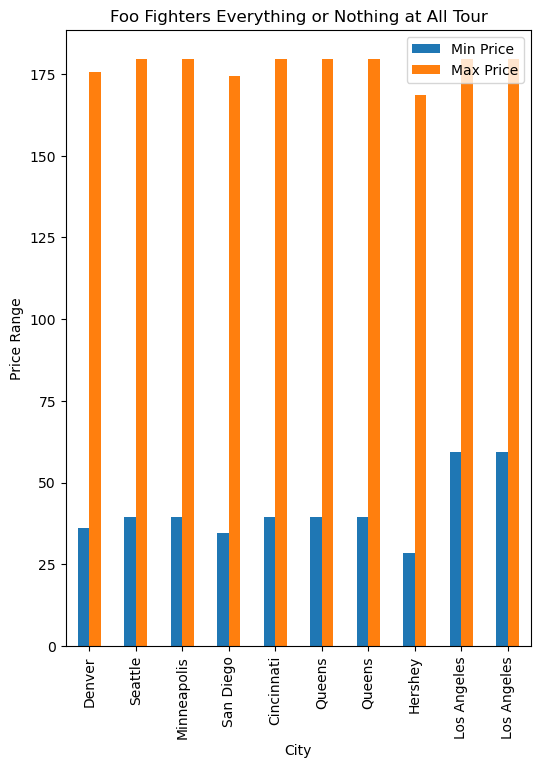

<Figure size 640x480 with 0 Axes>

In [20]:
# Create a bar chart 
max_chart = bar_ff_clean.plot(kind='bar', figsize=(6,8))

# Add labels
plt.xlabel('City')
plt.ylabel('Price Range')
plt.title('Foo Fighters Everything or Nothing at All Tour')

plt.savefig("output_data/FigFF.png")

plt.show()
plt.tight_layout()